In [1]:
import cv2 as cv
import numpy as np
import sys, os, pprint, glob, math, imghdr, pprint
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import Image,display_jpeg,display_png
%config IPCompleter.greedy=True

In [2]:
BASE_PATH = '/home/seki/_seki/color/'
IMG_PATH = BASE_PATH + 'image/'
TMP_PATH = BASE_PATH + 'tmp/'

In [3]:
# IPython.displayで画像表示
def display_img(img_data):

    img_type = imghdr.what(img_file)
    
    # 一時ファイル名設定
    out = TMP_PATH + datetime.now().strftime("%y%m%d_%H%M%S") + '.' + img_type
    
    # 画像データ(ndarray形式を一時ファイルに書き出す)
    cv.imwrite(out, img_data)
    
    # 一時ファイルを画面表示
    if img_type == 'png':
        display_png(Image(out))
    else:
        display_jpeg(Image(out))
    
    # 一時ファイル削除
    os.remove(out)


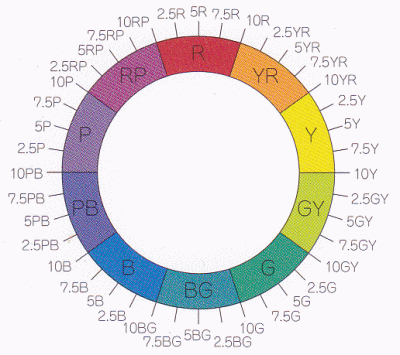

In [4]:
display_png(Image(IMG_PATH + 'Munsell.png'))

height:384  width:512  channel:3


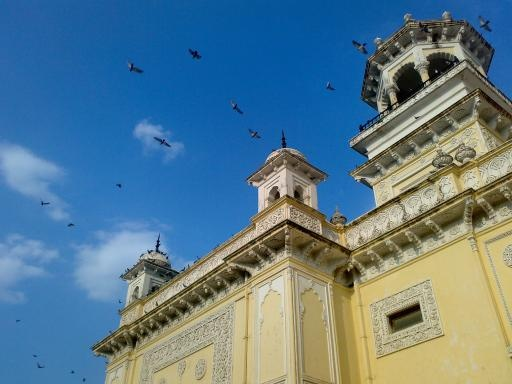

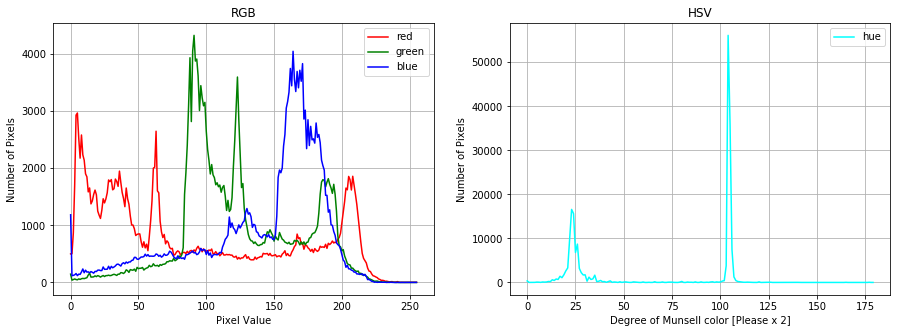

In [9]:
img_file = IMG_PATH + 'cathedral.jpg'
src = cv.imread(img_file)
(height, width, ch) = src.shape
print('height:{}  width:{}  channel:{}'.format(height, width, ch))
display_img(src)

src_hsv = cv.cvtColor(src, cv.COLOR_BGR2HSV)

fig, (plt1, plt2) = plt.subplots(ncols=2, figsize=(15,5))

histr_r = cv.calcHist([src], [2], None, [256], [0,256])
histr_g = cv.calcHist([src], [1], None, [256], [0,256])
histr_b = cv.calcHist([src], [0], None, [256], [0,256])
plt1.plot(histr_r, color='red', label='red')
plt1.plot(histr_g, color='green', label='green')
plt1.plot(histr_b, color='blue', label='blue')

histr_h = cv.calcHist([src_hsv], [0], None, [180], [0,180])
plt2.plot(histr_h, color='cyan', label='hue')

plt1.set_title('RGB')
plt1.set_xlabel('Pixel Value', fontsize='10')
plt1.set_ylabel('Number of Pixels', fontsize='10')
plt1.legend()
plt1.grid()

plt2.set_title('HSV')
plt2.set_xlabel('Degree of Munsell color [Please x 2]', fontsize='10')
plt2.set_ylabel('Number of Pixels', fontsize='10')
plt2.legend()
plt2.grid()

####fig.show() WARNINGが出るのでコメントアウト

height:640  width:640  channel:3


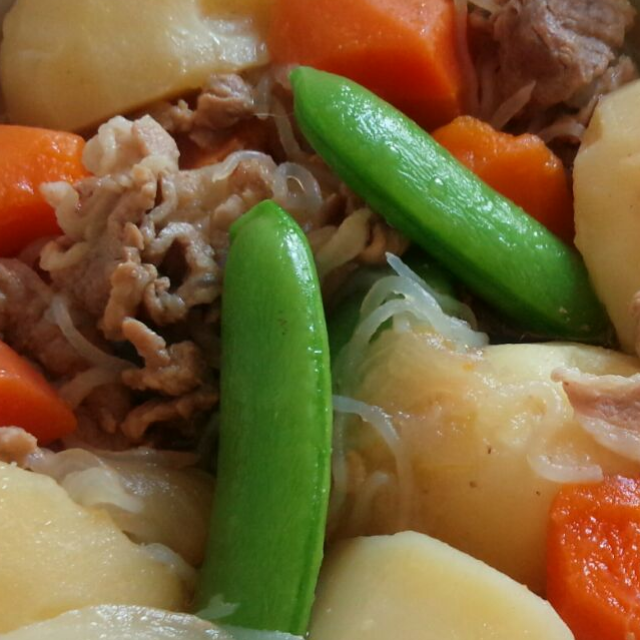

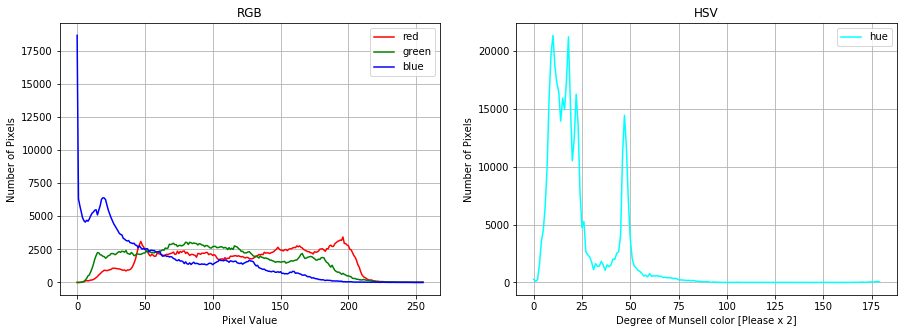

In [27]:
img_file = IMG_PATH + 'niku.png'
src = cv.imread(img_file)
(height, width, ch) = src.shape
print('height:{}  width:{}  channel:{}'.format(height, width, ch))
display_img(src)

src_hsv = cv.cvtColor(src, cv.COLOR_BGR2HSV)

fig, (plt1, plt2) = plt.subplots(ncols=2, figsize=(15,5))

histr_r = cv.calcHist([src], [2], None, [256], [0,256])
histr_g = cv.calcHist([src], [1], None, [256], [0,256])
histr_b = cv.calcHist([src], [0], None, [256], [0,256])
plt1.plot(histr_r, color='red', label='red')
plt1.plot(histr_g, color='green', label='green')
plt1.plot(histr_b, color='blue', label='blue')

histr_h = cv.calcHist([src_hsv], [0], None, [180], [0,180])
plt2.plot(histr_h, color='cyan', label='hue')

plt1.set_title('RGB')
plt1.set_xlabel('Pixel Value', fontsize='10')
plt1.set_ylabel('Number of Pixels', fontsize='10')
plt1.legend()
plt1.grid()

plt2.set_title('HSV')
plt2.set_xlabel('Degree of Munsell color [Please x 2]', fontsize='10')
plt2.set_ylabel('Number of Pixels', fontsize='10')
plt2.legend()
plt2.grid()

####fig.show() WARNINGが出るのでコメントアウト

In [28]:
print(type(histr_r))
print(len(histr_r))
print(histr_r.shape)

<class 'numpy.ndarray'>
256
(256, 1)


In [29]:
pprint.pprint(histr_r)

array([[0.000e+00],
       [2.000e+00],
       [5.000e+00],
       [1.800e+01],
       [4.100e+01],
       [5.300e+01],
       [1.080e+02],
       [1.420e+02],
       [1.280e+02],
       [1.400e+02],
       [1.810e+02],
       [1.840e+02],
       [2.230e+02],
       [2.850e+02],
       [3.620e+02],
       [4.470e+02],
       [5.740e+02],
       [6.550e+02],
       [7.680e+02],
       [8.500e+02],
       [9.220e+02],
       [9.050e+02],
       [8.950e+02],
       [9.200e+02],
       [9.580e+02],
       [9.790e+02],
       [1.067e+03],
       [1.074e+03],
       [1.070e+03],
       [1.049e+03],
       [1.031e+03],
       [1.021e+03],
       [9.980e+02],
       [9.430e+02],
       [9.220e+02],
       [9.410e+02],
       [8.680e+02],
       [9.400e+02],
       [9.400e+02],
       [9.680e+02],
       [1.063e+03],
       [1.228e+03],
       [1.466e+03],
       [1.748e+03],
       [2.177e+03],
       [2.614e+03],
       [2.882e+03],
       [3.098e+03],
       [2.827e+03],
       [2.680e+03],


In [33]:
histr_r_flat = histr_r.reshape(-1) # 一次元化
print(histr_r_flat.shape)
pprint.pprint(histr_r_flat)

(256,)
array([0.000e+00, 2.000e+00, 5.000e+00, 1.800e+01, 4.100e+01, 5.300e+01,
       1.080e+02, 1.420e+02, 1.280e+02, 1.400e+02, 1.810e+02, 1.840e+02,
       2.230e+02, 2.850e+02, 3.620e+02, 4.470e+02, 5.740e+02, 6.550e+02,
       7.680e+02, 8.500e+02, 9.220e+02, 9.050e+02, 8.950e+02, 9.200e+02,
       9.580e+02, 9.790e+02, 1.067e+03, 1.074e+03, 1.070e+03, 1.049e+03,
       1.031e+03, 1.021e+03, 9.980e+02, 9.430e+02, 9.220e+02, 9.410e+02,
       8.680e+02, 9.400e+02, 9.400e+02, 9.680e+02, 1.063e+03, 1.228e+03,
       1.466e+03, 1.748e+03, 2.177e+03, 2.614e+03, 2.882e+03, 3.098e+03,
       2.827e+03, 2.680e+03, 2.505e+03, 2.330e+03, 2.302e+03, 2.106e+03,
       1.997e+03, 2.120e+03, 2.065e+03, 1.971e+03, 1.986e+03, 2.212e+03,
       2.175e+03, 2.151e+03, 2.100e+03, 2.066e+03, 2.041e+03, 2.071e+03,
       2.127e+03, 2.112e+03, 2.155e+03, 2.188e+03, 2.221e+03, 2.298e+03,
       2.133e+03, 2.144e+03, 2.364e+03, 2.184e+03, 2.343e+03, 2.275e+03,
       2.361e+03, 2.381e+03, 2.192e+03, 2.28

In [34]:
histr_g_flat = histr_g.reshape(-1) # 一次元化
print(histr_g_flat.shape)
pprint.pprint(histr_g_flat)

(256,)
array([0.000e+00, 0.000e+00, 0.000e+00, 1.100e+01, 2.700e+01, 8.200e+01,
       1.780e+02, 2.990e+02, 4.940e+02, 5.720e+02, 8.010e+02, 1.054e+03,
       1.376e+03, 1.754e+03, 2.032e+03, 2.253e+03, 2.233e+03, 2.092e+03,
       2.071e+03, 1.974e+03, 1.955e+03, 1.828e+03, 1.914e+03, 2.024e+03,
       2.047e+03, 2.181e+03, 2.185e+03, 2.161e+03, 2.099e+03, 2.163e+03,
       2.271e+03, 2.331e+03, 2.278e+03, 2.361e+03, 2.335e+03, 2.286e+03,
       2.416e+03, 2.199e+03, 2.163e+03, 2.127e+03, 2.265e+03, 2.166e+03,
       2.024e+03, 2.058e+03, 2.165e+03, 2.144e+03, 2.122e+03, 2.131e+03,
       2.171e+03, 2.220e+03, 2.222e+03, 2.421e+03, 2.309e+03, 2.406e+03,
       2.284e+03, 2.248e+03, 2.251e+03, 2.237e+03, 2.315e+03, 2.306e+03,
       2.333e+03, 2.376e+03, 2.386e+03, 2.469e+03, 2.429e+03, 2.600e+03,
       2.560e+03, 2.607e+03, 2.884e+03, 2.867e+03, 2.905e+03, 2.963e+03,
       2.854e+03, 2.863e+03, 2.714e+03, 2.790e+03, 2.806e+03, 2.760e+03,
       2.803e+03, 2.884e+03, 3.036e+03, 3.01

In [38]:
#comb = histr_r_flat
##comb.extend(histr_g_flat)
#print(comb.shape)
#pprint.pprint(comb)
comb = np.concatenate([histr_r_flat, histr_g_flat])
print(comb.shape)
pprint.pprint(comb)

(512,)
array([0.000e+00, 2.000e+00, 5.000e+00, 1.800e+01, 4.100e+01, 5.300e+01,
       1.080e+02, 1.420e+02, 1.280e+02, 1.400e+02, 1.810e+02, 1.840e+02,
       2.230e+02, 2.850e+02, 3.620e+02, 4.470e+02, 5.740e+02, 6.550e+02,
       7.680e+02, 8.500e+02, 9.220e+02, 9.050e+02, 8.950e+02, 9.200e+02,
       9.580e+02, 9.790e+02, 1.067e+03, 1.074e+03, 1.070e+03, 1.049e+03,
       1.031e+03, 1.021e+03, 9.980e+02, 9.430e+02, 9.220e+02, 9.410e+02,
       8.680e+02, 9.400e+02, 9.400e+02, 9.680e+02, 1.063e+03, 1.228e+03,
       1.466e+03, 1.748e+03, 2.177e+03, 2.614e+03, 2.882e+03, 3.098e+03,
       2.827e+03, 2.680e+03, 2.505e+03, 2.330e+03, 2.302e+03, 2.106e+03,
       1.997e+03, 2.120e+03, 2.065e+03, 1.971e+03, 1.986e+03, 2.212e+03,
       2.175e+03, 2.151e+03, 2.100e+03, 2.066e+03, 2.041e+03, 2.071e+03,
       2.127e+03, 2.112e+03, 2.155e+03, 2.188e+03, 2.221e+03, 2.298e+03,
       2.133e+03, 2.144e+03, 2.364e+03, 2.184e+03, 2.343e+03, 2.275e+03,
       2.361e+03, 2.381e+03, 2.192e+03, 2.28